In [1]:
# generic data science libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import scikit-learn
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, classification_report, auc, confusion_matrix, roc_curve

In [2]:
df = pd.read_csv("Final_Clean.csv")
df

,Unnamed: 0,diagnosis,concave_points_worst_bins,perimeter_worst_bins,concave_points_mean_bins,radius_worst_bins,perimeter_mean,area_worst,radius_mean,area_mean
0,0,1,D,D,D,D,122.80,2019.0,17.99,1001.0
1,1,1,D,D,C,D,132.90,1956.0,20.57,1326.0
2,2,1,D,D,D,D,130.00,1709.0,19.69,1203.0
3,3,1,D,C,D,B,77.58,567.7,11.42,386.1
4,4,1,D,D,D,D,135.10,1575.0,20.29,1297.0
...,...,...,...,...,...,...,...,...,...,...
564,564,1,D,D,D,D,142.00,2027.0,21.56,1479.0
565,565,1,D,D,D,D,131.20,1731.0,20.13,1261.0
566,566,1,C,D,C,C,108.30,1124.0,16.60,858.1
567,567,1,D,D,D,D,140.10,1821.0,20.60,1265.0


In [3]:
df2 = df.drop(columns=['Unnamed: 0'])
df2

,diagnosis,concave_points_worst_bins,perimeter_worst_bins,concave_points_mean_bins,radius_worst_bins,perimeter_mean,area_worst,radius_mean,area_mean
0,1,D,D,D,D,122.80,2019.0,17.99,1001.0
1,1,D,D,C,D,132.90,1956.0,20.57,1326.0
2,1,D,D,D,D,130.00,1709.0,19.69,1203.0
3,1,D,C,D,B,77.58,567.7,11.42,386.1
4,1,D,D,D,D,135.10,1575.0,20.29,1297.0
...,...,...,...,...,...,...,...,...,...
564,1,D,D,D,D,142.00,2027.0,21.56,1479.0
565,1,D,D,D,D,131.20,1731.0,20.13,1261.0
566,1,C,D,C,C,108.30,1124.0,16.60,858.1
567,1,D,D,D,D,140.10,1821.0,20.60,1265.0


In [15]:
df2.describe()

,diagnosis,perimeter_mean,area_worst,radius_mean,area_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,91.969033,880.583128,14.127292,654.889104
std,0.483918,24.298981,569.356993,3.524049,351.914129
min,0.000000,43.790000,185.200000,6.981000,143.500000
25%,0.000000,75.170000,515.300000,11.700000,420.300000
50%,0.000000,86.240000,686.500000,13.370000,551.100000
75%,1.000000,104.100000,1084.000000,15.780000,782.700000
max,1.000000,188.500000,4254.000000,28.110000,2501.000000


In [4]:
df2.columns

Index(['diagnosis', 'concave_points_worst_bins', 'perimeter_worst_bins',
       'concave_points_mean_bins', 'radius_worst_bins', 'perimeter_mean',
       'area_worst', 'radius_mean', 'area_mean'],
      dtype='object')

In [5]:
df_sub= pd.DataFrame(df2.diagnosis)
df_sub

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [33]:
# get dums
dums_linear = pd.get_dummies(df2.loc[:, ['concave_points_worst_bins', 'perimeter_worst_bins',
       'concave_points_mean_bins', 'radius_worst_bins']], drop_first=True)
dums_other = pd.get_dummies(df2.loc[:, ['concave_points_worst_bins', 'perimeter_worst_bins',
       'concave_points_mean_bins', 'radius_worst_bins']], drop_first=False)
num_df = df2.loc[:, ['perimeter_mean',
       'area_worst', 'radius_mean', 'area_mean']]
#concat
df_sub_linear = pd.concat([df_sub, dums_linear, num_df], axis=1)
df_sub_other = pd.concat([df_sub, dums_other,num_df], axis=1)

df_sub_linear2=pd.concat([dums_linear, num_df], axis=1)

In [45]:
df_sub_linear2.columns

Index(['concave_points_worst_bins_B', 'concave_points_worst_bins_C',
       'concave_points_worst_bins_D', 'perimeter_worst_bins_B',
       'perimeter_worst_bins_C', 'perimeter_worst_bins_D',
       'concave_points_mean_bins_B', 'concave_points_mean_bins_C',
       'concave_points_mean_bins_D', 'radius_worst_bins_B',
       'radius_worst_bins_C', 'radius_worst_bins_D', 'perimeter_mean',
       'area_worst', 'radius_mean', 'area_mean'],
      dtype='object')

In [24]:
df_sub_linear

,diagnosis,concave_points_worst_bins_B,concave_points_worst_bins_C,concave_points_worst_bins_D,perimeter_worst_bins_B,perimeter_worst_bins_C,perimeter_worst_bins_D,concave_points_mean_bins_B,concave_points_mean_bins_C,concave_points_mean_bins_D,radius_worst_bins_B,radius_worst_bins_C,radius_worst_bins_D,perimeter_mean,area_worst,radius_mean,area_mean
0,1,0,0,1,0,0,1,0,0,1,0,0,1,122.80,2019.0,17.99,1001.0
1,1,0,0,1,0,0,1,0,1,0,0,0,1,132.90,1956.0,20.57,1326.0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,130.00,1709.0,19.69,1203.0
3,1,0,0,1,0,1,0,0,0,1,1,0,0,77.58,567.7,11.42,386.1
4,1,0,0,1,0,0,1,0,0,1,0,0,1,135.10,1575.0,20.29,1297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0,0,1,0,0,1,0,0,1,0,0,1,142.00,2027.0,21.56,1479.0
565,1,0,0,1,0,0,1,0,0,1,0,0,1,131.20,1731.0,20.13,1261.0
566,1,0,1,0,0,0,1,0,1,0,0,1,0,108.30,1124.0,16.60,858.1
567,1,0,0,1,0,0,1,0,0,1,0,0,1,140.10,1821.0,20.60,1265.0


In [7]:
# get pandas columns for prediction
target = df_sub_linear["diagnosis"]
features = df_sub_linear.drop(["diagnosis"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

In [8]:
target.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Logistic Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       285
           1       0.98      0.92      0.95       170

    accuracy                           0.96       455
   macro avg       0.97      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455


Confusion Matrix - In Sample
[[281   4]
 [ 13 157]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix - Out Sample
[[70  2]
 [ 4 38]]


C:\Users\sslomowitz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


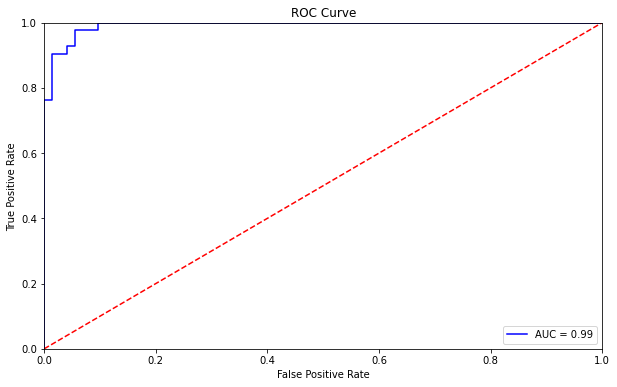

In [9]:
# train the model
reg = LogisticRegression()
reg.fit(X_train, y_train)

#get predictions
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

# get evaluation report
print("Logistic Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [10]:
import pickle

In [11]:
#save the model to disk
filename = 'finalized_model50.sav'
pickle.dump(reg, open(filename, 'wb'))

In [38]:
content = {'concave_points_worst_bins':"A",
'perimeter_worst_bins':"B", 'concave_points_mean_bins':"C",
'radius_worst_bins':"D",
'perimeter_mean':"86", 'area_worst':"280", 'radius_mean':"15", 'area_mean':"550"}

In [39]:
content

{'concave_points_worst_bins': 'A',
 'perimeter_worst_bins': 'B',
 'concave_points_mean_bins': 'C',
 'radius_worst_bins': 'D',
 'perimeter_mean': '86',
 'area_worst': '280',
 'radius_mean': '15',
 'area_mean': '550'}

In [49]:
# parse
concave_points_worst_bins = content["concave_points_worst_bins"]
perimeter_worst_bins = content["perimeter_worst_bins"]
concave_points_mean_bins = content["concave_points_mean_bins"]
radius_worst_bins = content["radius_worst_bins"]
perimeter_mean = float(content["perimeter_mean"])
area_worst = float(content["area_worst"])
radius_mean = float(content["radius_mean"])
area_mean = float(content["area_mean"])

In [56]:
concave_points_worst_bins_A=0
concave_points_worst_bins_B=0
concave_points_worst_bins_C=0
concave_points_worst_bins_D=0

perimeter_worst_bins_A=0
perimeter_worst_bins_B=0
perimeter_worst_bins_C=0
perimeter_worst_bins_D=0

concave_points_mean_bins_A=0
concave_points_mean_bins_B=0
concave_points_mean_bins_C=0
concave_points_mean_bins_D=0

radius_worst_bins_A=0
radius_worst_bins_B=0 
radius_worst_bins_C=0
radius_worst_bins_D=0

In [1]:
 # parse pclass
if (concave_points_worst_bins == "A"):
     concave_points_worst_bins_A = 1
if (concave_points_worst_bins == "B"):
    concave_points_worst_bins_B = 1
elif (concave_points_worst_bins == "C"):
    concave_points_worst_bins_C = 1
elif (concave_points_worst_bins == "D"):
    concave_points_worst_bins_D = 1
else:
    pass

# parse embarked
if (perimeter_worst_bins == "A"):
    perimeter_worst_bins_A = 1
if (perimeter_worst_bins == "B"):
    perimeter_worst_bins_B = 1
elif (perimeter_worst_bins == "C"):
    perimeter_worst_bins_C = 1
elif (perimeter_worst_bins == "D"):
    perimeter_worst_bins_D = 1
else:
    pass

if (concave_points_mean_bins == "A"):
    concave_points_mean_bins_A = 1
if (concave_points_mean_bins == "B"):
    concave_points_mean_bins_B = 1
elif (concave_points_mean_bins == "C"):
    concave_points_mean_bins_C = 1
elif (concave_points_mean_bins == "D"):
    concave_points_mean_bins_D = 1
else:
    pass

if (radius_worst_bins == "A"):
    radius_worst_bins_A = 1
if (radius_worst_bins == "B"):
    radius_worst_bins_B = 1
elif (radius_worst_bins == "C"):
    radius_worst_bins_C = 1
elif (radius_worst_bins == "D"):
    radius_worst_bins_D = 1
else:
    pass

NameError: name 'concave_points_worst_bins' is not defined

In [68]:
# 'concave_points_worst_bins_B', 'concave_points_worst_bins_C',
# 'concave_points_worst_bins_D', 'perimeter_worst_bins_B',
# 'perimeter_worst_bins_C', 'perimeter_worst_bins_D',
# 'concave_points_mean_bins_B', 'concave_points_mean_bins_C',
# 'concave_points_mean_bins_D', 'radius_worst_bins_B',
# 'radius_worst_bins_C', 'radius_worst_bins_D', 'perimeter_mean',
# 'area_worst', 'radius_mean', 'area_mean'

In [69]:
input_pred = [[concave_points_worst_bins_B, concave_points_worst_bins_C, concave_points_worst_bins_D, perimeter_worst_bins_B, perimeter_worst_bins_C, perimeter_worst_bins_D, concave_points_mean_bins_B,concave_points_mean_bins_C,concave_points_mean_bins_D, radius_worst_bins_B,  radius_worst_bins_C, radius_worst_bins_D,perimeter_mean, area_worst, radius_mean, area_mean]]
input_pred

[[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 86.0, 280.0, 15.0, 550.0]]

In [70]:
pd.DataFrame(input_pred, columns=df_sub_linear2.columns)

,concave_points_worst_bins_B,concave_points_worst_bins_C,concave_points_worst_bins_D,perimeter_worst_bins_B,perimeter_worst_bins_C,perimeter_worst_bins_D,concave_points_mean_bins_B,concave_points_mean_bins_C,concave_points_mean_bins_D,radius_worst_bins_B,radius_worst_bins_C,radius_worst_bins_D,perimeter_mean,area_worst,radius_mean,area_mean
0,0,0,0,1,0,0,0,1,0,0,0,1,86.0,280.0,15.0,550.0


In [74]:
filename = 'finalized_model50.sav'
reg_load = pickle.load(open(filename, 'rb'))

In [75]:
X = np.array(input_pred)
preds = reg_load.predict_proba(X)
preds_singular = reg_load.predict(X)

In [76]:
preds

array([[9.99999408e-01, 5.91875713e-07]])

In [77]:
preds_singular

array([0], dtype=int64)